### Prediciting today's stress levels


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import skew, normaltest
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
# Reading the csv file
df = pd.read_csv("C:/Users/s4031/OneDrive/Desktop/Study materials/Semester 4/Project/realistic_demo_10k_rounded.csv")

In [4]:
# Displaying top 15 rows in the dataset
df.head(15)

,Date,stress_level,energy_level,sleep_hours,hrv_ms,steps,aqi,pm25,pm10,temperature_celsius,humidity,uv_index,nutrition_item_count,body_survey_avg_severity,body_survey_condition_count,journal_sentiment
0,01/01/2024,7,3.0,6.3,48.3,2586.0,73.0,76.6,181.7,22.6,75.0,2.0,10.0,NaN,4.0,-1.0
1,02/01/2024,4,7.0,8.1,60.0,8242.7,141.0,27.1,75.2,19.9,83.3,10.0,NaN,1.1,2.0,0.2
2,03/01/2024,8,3.0,4.9,49.8,2000.0,73.0,NaN,15.5,12.6,51.9,5.0,17.0,3.2,4.0,0.0
3,04/01/2024,5,6.0,6.7,57.6,5851.3,126.0,79.8,136.0,18.3,59.2,6.0,9.0,0.1,3.0,0.4
4,05/01/2024,7,5.0,6.9,56.8,5627.8,138.0,64.8,75.5,21.8,40.2,10.0,16.0,4.4,4.0,0.2
5,06/01/2024,10,2.0,5.3,49.7,2464.2,33.0,34.3,46.4,35.0,30.5,1.0,19.0,5.0,5.0,-0.9
6,07/01/2024,3,7.0,7.5,58.3,7070.2,NaN,50.6,NaN,22.8,32.1,8.0,17.0,1.2,2.0,NaN
7,08/01/2024,7,3.0,4.9,46.2,3495.8,49.0,32.3,47.2,10.5,79.1,5.0,17.0,3.4,5.0,NaN
8,09/01/2024,8,2.0,4.7,44.4,2000.0,83.0,79.7,55.1,15.2,57.9,10.0,11.0,4.5,4.0,-0.7
9,10/01/2024,5,7.0,7.2,56.2,8932.8,137.0,10.1,161.2,18.9,46.3,7.0,16.0,3.2,2.0,0.1


In [5]:
#Check for missing values in each column
df.isnull().sum()

Date                              0
stress_level                      0
energy_level                      0
sleep_hours                       0
hrv_ms                            0
steps                             0
aqi                             981
pm25                            773
pm10                            838
temperature_celsius               0
humidity                          0
uv_index                        506
nutrition_item_count            664
body_survey_avg_severity       1078
body_survey_condition_count       0
journal_sentiment              1190
dtype: int64

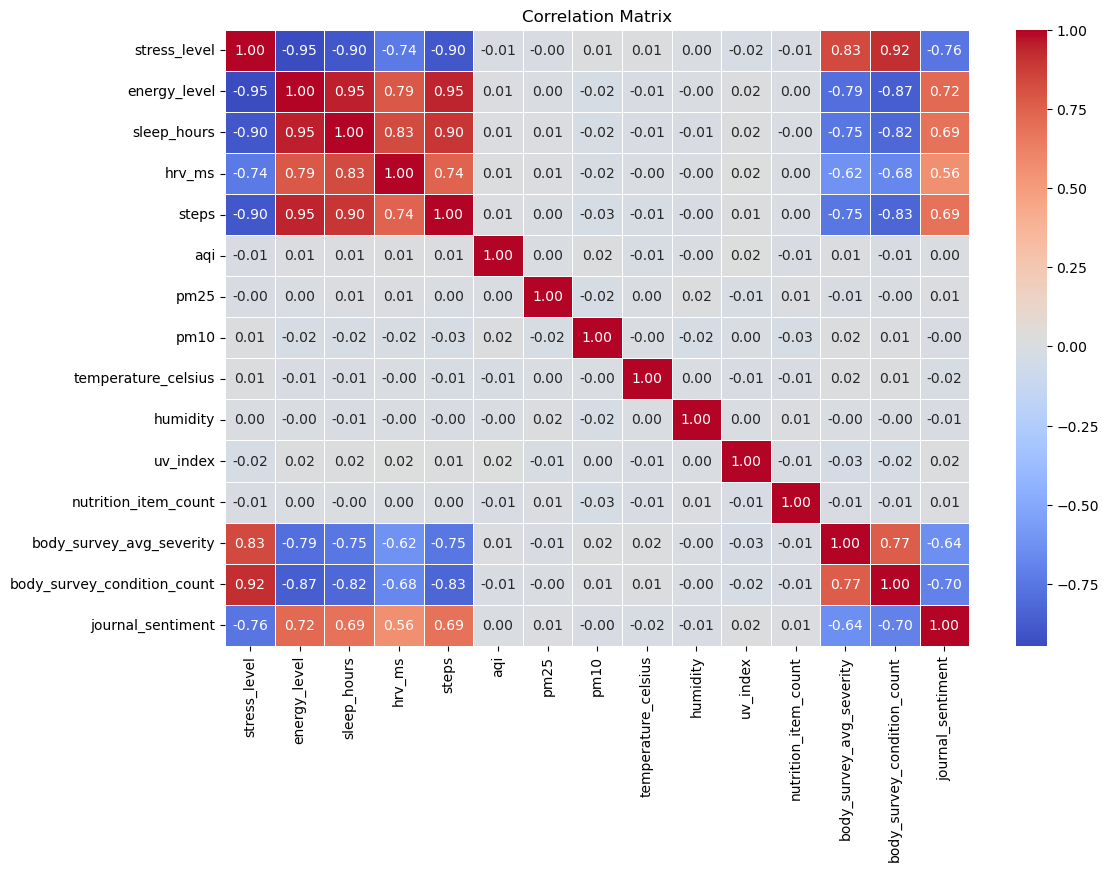

In [6]:
# Exclude non-numeric column for correlation (Date)
df_corr = df.drop(columns=['Date'])

# Compute Correlation Matrix
corr_matrix = df_corr.corr()

# Plot Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [7]:
# Information on datatypes in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         10000 non-null  object 
 1   stress_level                 10000 non-null  int64  
 2   energy_level                 10000 non-null  float64
 3   sleep_hours                  10000 non-null  float64
 4   hrv_ms                       10000 non-null  float64
 5   steps                        10000 non-null  float64
 6   aqi                          9019 non-null   float64
 7   pm25                         9227 non-null   float64
 8   pm10                         9162 non-null   float64
 9   temperature_celsius          10000 non-null  float64
 10  humidity                     10000 non-null  float64
 11  uv_index                     9494 non-null   float64
 12  nutrition_item_count         9336 non-null   float64
 13  body_survey_avg_s

In [8]:
# Conversion of date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')


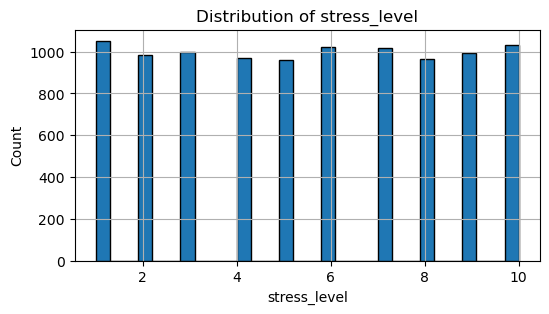

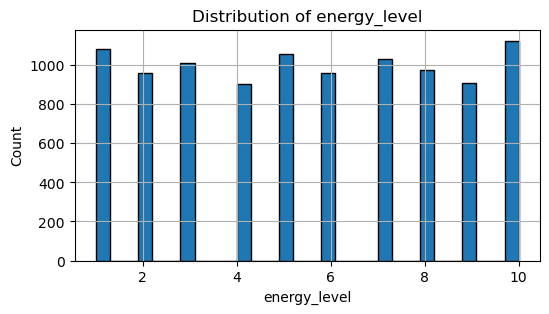

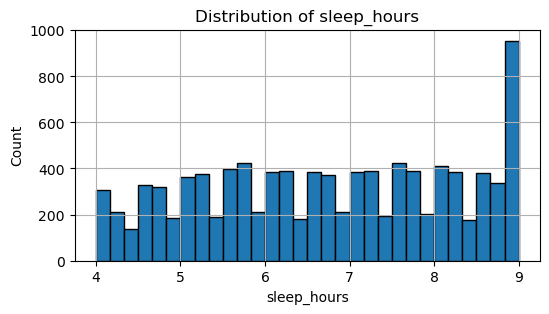

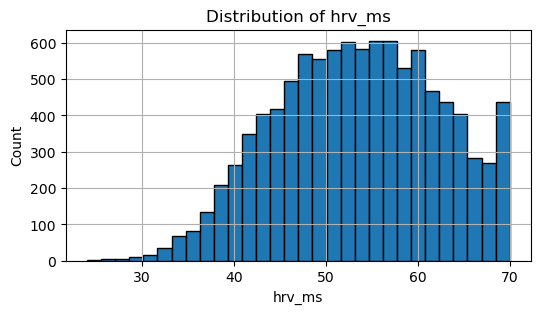

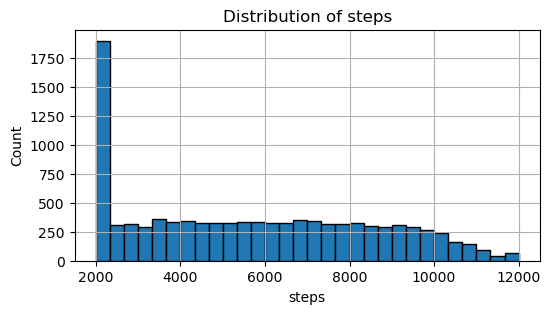

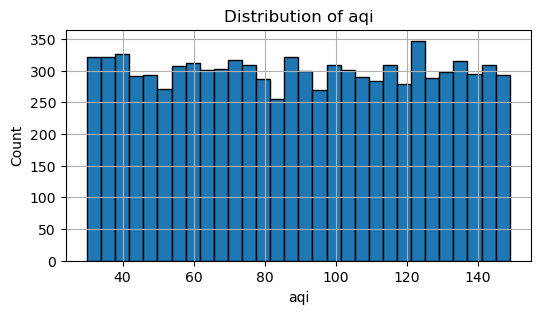

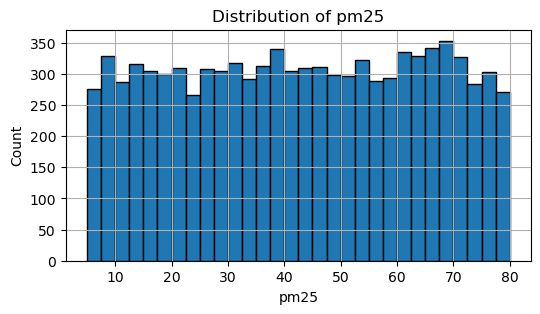

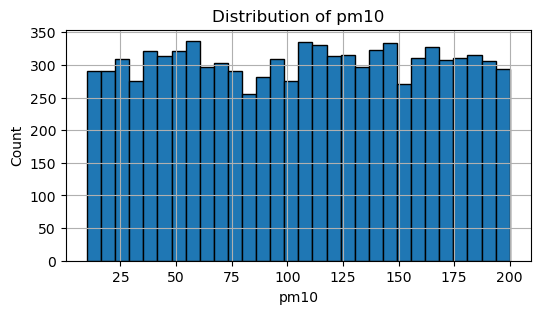

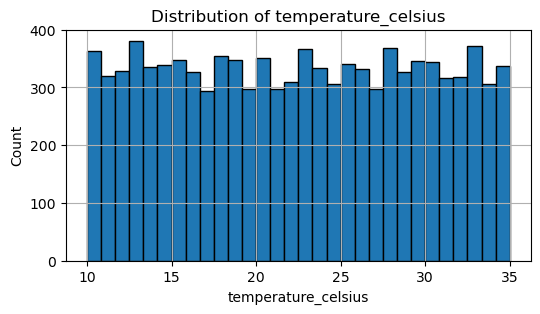

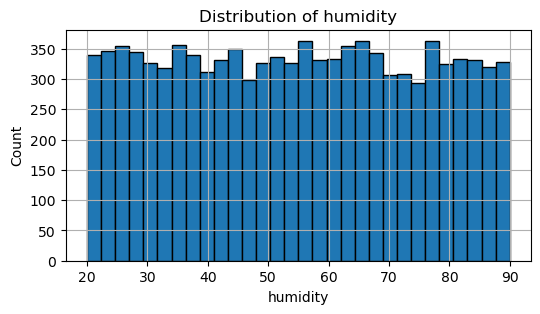

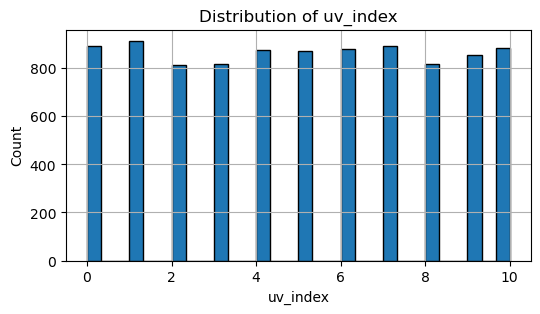

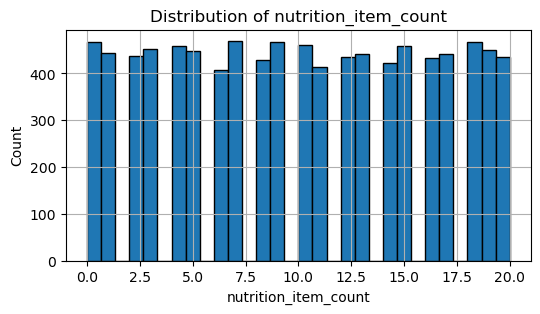

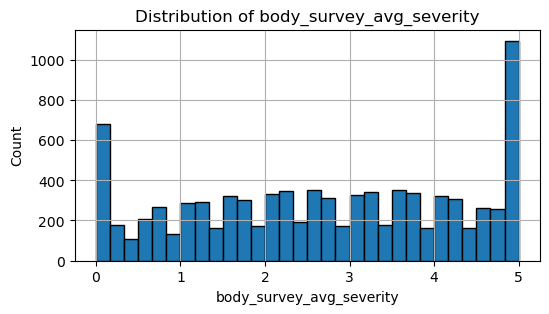

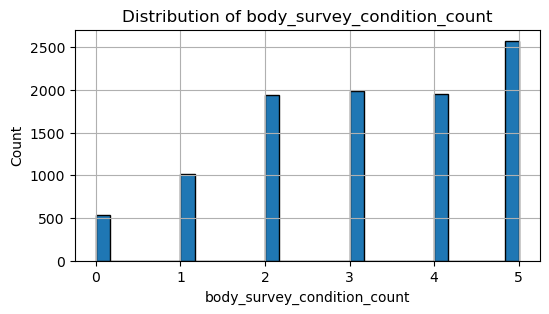

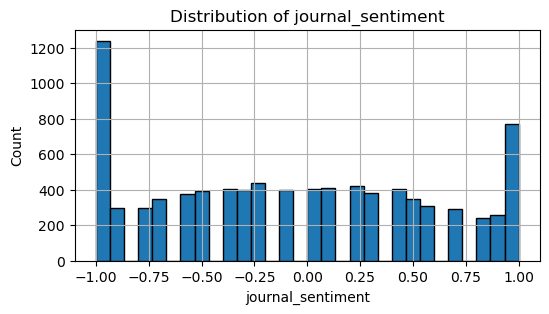

In [9]:
# Plot histograms for all numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    df[col].hist(bins=30, edgecolor='k')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

In [10]:
# Summary of missing values
missing_summary = df.isnull().sum().to_frame(name='Missing Values')
missing_summary['% Missing'] = (missing_summary['Missing Values'] / len(df)) * 100
print(missing_summary.sort_values(by='% Missing', ascending=False))


                             Missing Values  % Missing
journal_sentiment                      1190      11.90
body_survey_avg_severity               1078      10.78
aqi                                     981       9.81
pm10                                    838       8.38
pm25                                    773       7.73
nutrition_item_count                    664       6.64
uv_index                                506       5.06
Date                                      0       0.00
stress_level                              0       0.00
energy_level                              0       0.00
sleep_hours                               0       0.00
hrv_ms                                    0       0.00
steps                                     0       0.00
temperature_celsius                       0       0.00
humidity                                  0       0.00
body_survey_condition_count               0       0.00


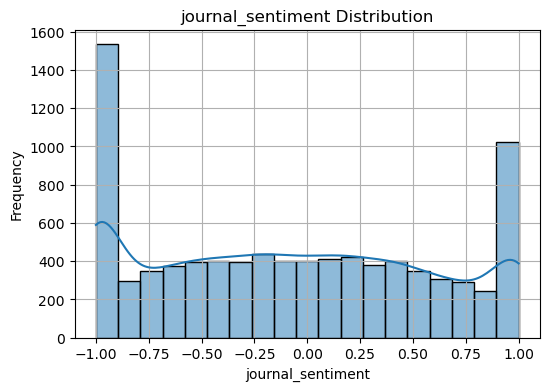

journal_sentiment: Skewness = 0.11 | D’Agostino p-value = 0.0000 -> Not Normal


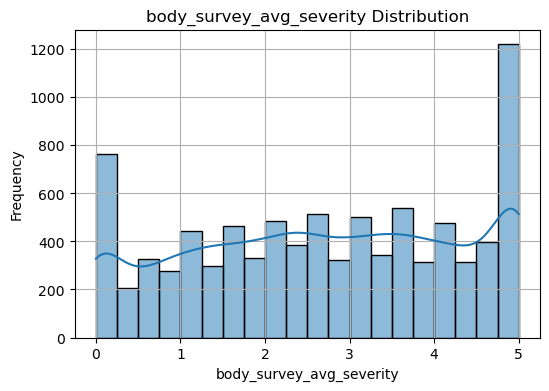

body_survey_avg_severity: Skewness = -0.12 | D’Agostino p-value = 0.0000 -> Not Normal


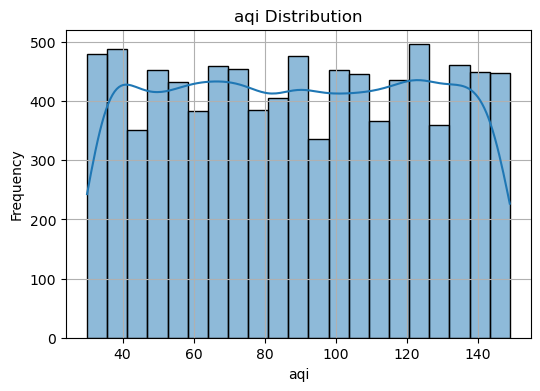

aqi: Skewness = 0.00 | D’Agostino p-value = 0.0000 -> Not Normal


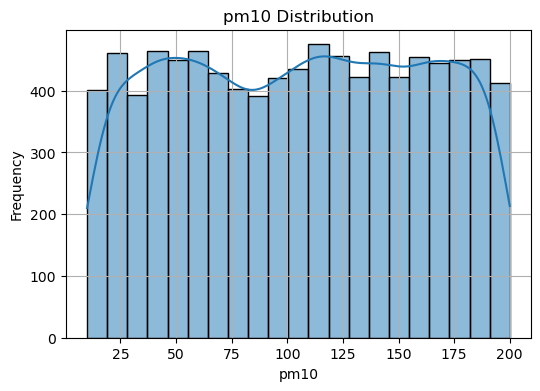

pm10: Skewness = -0.02 | D’Agostino p-value = 0.0000 -> Not Normal


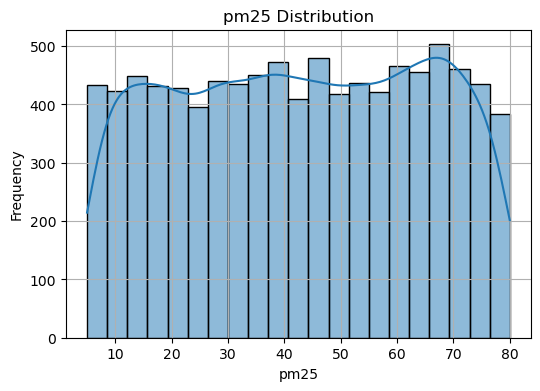

pm25: Skewness = -0.03 | D’Agostino p-value = 0.0000 -> Not Normal


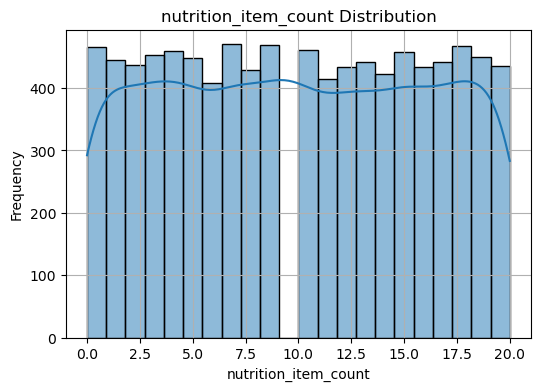

nutrition_item_count: Skewness = 0.01 | D’Agostino p-value = 0.0000 -> Not Normal


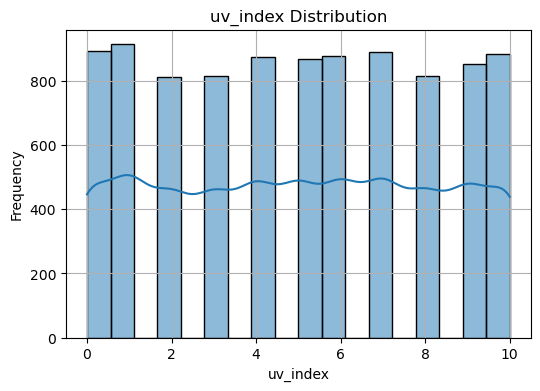

uv_index: Skewness = -0.00 | D’Agostino p-value = 0.0000 -> Not Normal


In [11]:
cols_with_missing = [
    "journal_sentiment", "body_survey_avg_severity", "aqi",
    "pm10", "pm25", "nutrition_item_count", "uv_index"
]

# Visualize & compute skewness + D’Agostino normality test
for col in cols_with_missing:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
    
    sk = skew(df[col].dropna())
    stat, p = normaltest(df[col].dropna())
    
    print(f"{col}: Skewness = {sk:.2f} | D’Agostino p-value = {p:.4f} -> {'Not Normal' if p < 0.05 else 'Possibly Normal'}")

In [12]:
# Columns that will be median-imputed (flat or uniform distribution, low correlation)
#median_impute_cols = ['aqi', 'pm25', 'pm10', 'uv_index', 'nutrition_item_count']
mean_impute_cols = ['aqi', 'pm25', 'pm10']

# Create the imputer
#median_imputer = SimpleImputer(strategy='median')
mean_imputer = SimpleImputer(strategy='mean')
# Apply imputation
#df[median_impute_cols] = median_imputer.fit_transform(df[median_impute_cols])
df[mean_impute_cols] = mean_imputer.fit_transform(df[mean_impute_cols])

In [13]:
# Columns that will be median-imputed (flat or uniform distribution, low correlation)
mode_impute_cols = ['uv_index', 'nutrition_item_count']
#mean_impute_cols = ['aqi', 'pm25', 'pm10']

# Create the imputer
mode_imputer = SimpleImputer(strategy='most_frequent')
#mean_imputer = SimpleImputer(strategy='mean')
# Apply imputation
df[mode_impute_cols] = mode_imputer.fit_transform(df[mode_impute_cols])
#df[mean_impute_cols] = mean_imputer.fit_transform(df[mean_impute_cols])

In [14]:
# Displaying the missing values in the columns
df.isna().sum()

Date                              0
stress_level                      0
energy_level                      0
sleep_hours                       0
hrv_ms                            0
steps                             0
aqi                               0
pm25                              0
pm10                              0
temperature_celsius               0
humidity                          0
uv_index                          0
nutrition_item_count              0
body_survey_avg_severity       1078
body_survey_condition_count       0
journal_sentiment              1190
dtype: int64

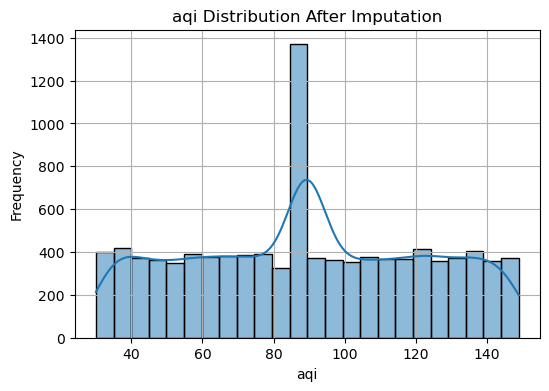

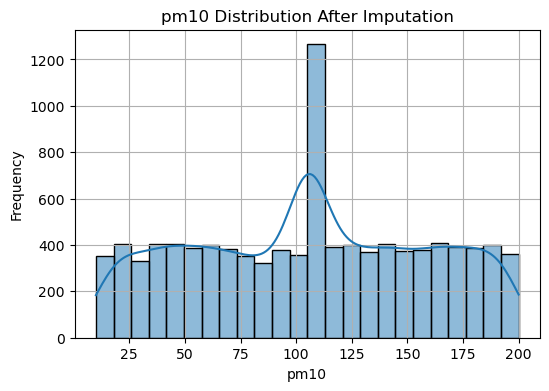

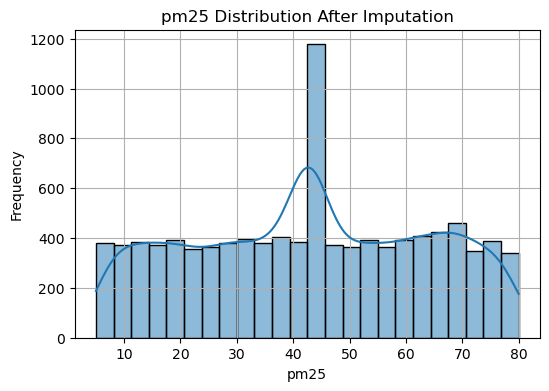

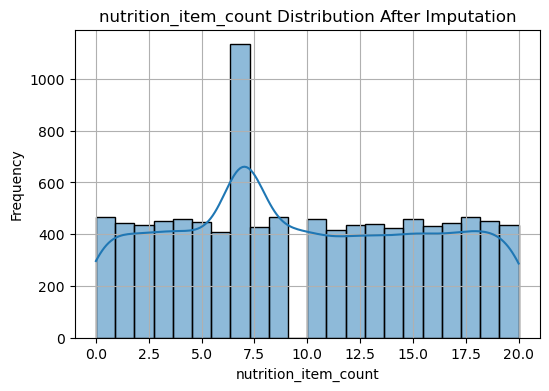

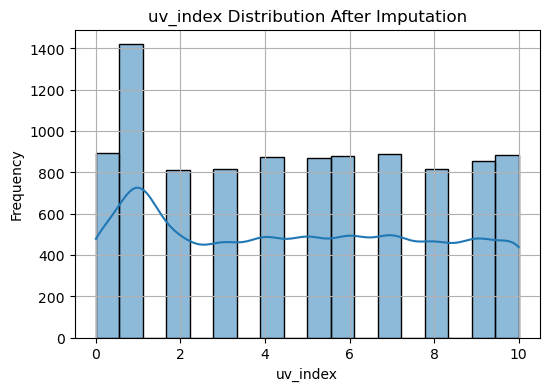

In [15]:
# Columns you imputed earlier
cols_with_missing = [ "aqi", "pm10", "pm25", "nutrition_item_count", "uv_index"
]

# Plot distributions after imputation
for col in cols_with_missing:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution After Imputation")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [16]:
# Convert 'steps' and 'nutrition_item_count' columns to integer type
df['steps'] = df['steps'].astype(int)
df['nutrition_item_count'] = df['nutrition_item_count'].astype(int)
#df['stress_level'] = df['stress_level'].astype(int)
df['energy_level'] = df['energy_level'].astype(int)
df['aqi'] = df['aqi'].astype(int)
#df['humidity'] = df['humidity'].astype(int)
df['uv_index'] = df['uv_index'].astype(int)
df['body_survey_condition_count'] = df['body_survey_condition_count'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         10000 non-null  datetime64[ns]
 1   stress_level                 10000 non-null  int64         
 2   energy_level                 10000 non-null  int32         
 3   sleep_hours                  10000 non-null  float64       
 4   hrv_ms                       10000 non-null  float64       
 5   steps                        10000 non-null  int32         
 6   aqi                          10000 non-null  int32         
 7   pm25                         10000 non-null  float64       
 8   pm10                         10000 non-null  float64       
 9   temperature_celsius          10000 non-null  float64       
 10  humidity                     10000 non-null  float64       
 11  uv_index                     10000 non-nul

In [18]:
df.head()

,Date,stress_level,energy_level,sleep_hours,hrv_ms,steps,aqi,pm25,pm10,temperature_celsius,humidity,uv_index,nutrition_item_count,body_survey_avg_severity,body_survey_condition_count,journal_sentiment
0,2024-01-01,7,3,6.3,48.3,2586,73,76.600000,181.7,22.6,75.0,2,10,NaN,4,-1.0
1,2024-01-02,4,7,8.1,60.0,8242,141,27.100000,75.2,19.9,83.3,10,7,1.1,2,0.2
2,2024-01-03,8,3,4.9,49.8,2000,73,42.729262,15.5,12.6,51.9,5,17,3.2,4,0.0
3,2024-01-04,5,6,6.7,57.6,5851,126,79.800000,136.0,18.3,59.2,6,9,0.1,3,0.4
4,2024-01-05,7,5,6.9,56.8,5627,138,64.800000,75.5,21.8,40.2,10,16,4.4,4,0.2


In [19]:
# Columns that need KNN imputation
knn_cols = ['journal_sentiment', 'body_survey_avg_severity']

#  Standardize only the columns needed for KNN
scaler_knn = StandardScaler()
df_knn_scaled = pd.DataFrame(scaler_knn.fit_transform(df[knn_cols]), columns=knn_cols)

In [20]:
#  Apply KNN imputation (k=5 )
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn_scaled), columns=knn_cols)

In [21]:
# Inverse transform back to original scale
df[knn_cols] = pd.DataFrame(scaler_knn.inverse_transform(df_knn_imputed), columns=knn_cols)

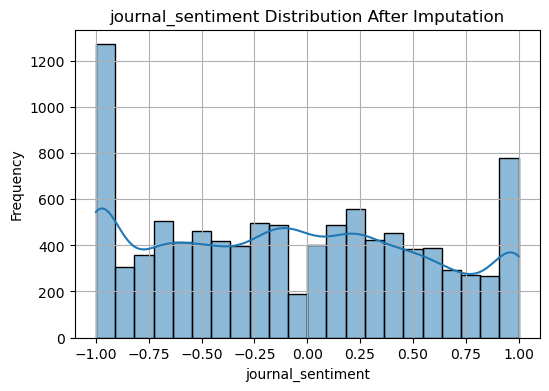

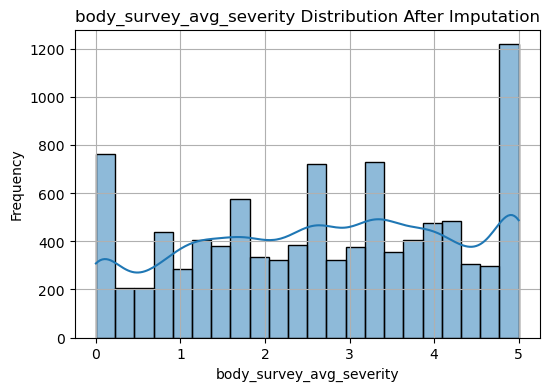

In [22]:
# Columns you imputed earlier
cols_with_missing = [
    "journal_sentiment", "body_survey_avg_severity"
]

# Plot distributions after imputation
for col in cols_with_missing:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution After Imputation")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [23]:
df.isna().sum()

Date                           0
stress_level                   0
energy_level                   0
sleep_hours                    0
hrv_ms                         0
steps                          0
aqi                            0
pm25                           0
pm10                           0
temperature_celsius            0
humidity                       0
uv_index                       0
nutrition_item_count           0
body_survey_avg_severity       0
body_survey_condition_count    0
journal_sentiment              0
dtype: int64

In [24]:
import pandas as pd

# Assuming df is your DataFrame
df.to_csv('output.csv', index=False)

print("✅ DataFrame saved to output.csv")


✅ DataFrame saved to output.csv


In [25]:
df.head()

,Date,stress_level,energy_level,sleep_hours,hrv_ms,steps,aqi,pm25,pm10,temperature_celsius,humidity,uv_index,nutrition_item_count,body_survey_avg_severity,body_survey_condition_count,journal_sentiment
0,2024-01-01,7,3,6.3,48.3,2586,73,76.600000,181.7,22.6,75.0,2,10,3.98,4,-1.0
1,2024-01-02,4,7,8.1,60.0,8242,141,27.100000,75.2,19.9,83.3,10,7,1.10,2,0.2
2,2024-01-03,8,3,4.9,49.8,2000,73,42.729262,15.5,12.6,51.9,5,17,3.20,4,0.0
3,2024-01-04,5,6,6.7,57.6,5851,126,79.800000,136.0,18.3,59.2,6,9,0.10,3,0.4
4,2024-01-05,7,5,6.9,56.8,5627,138,64.800000,75.5,21.8,40.2,10,16,4.40,4,0.2


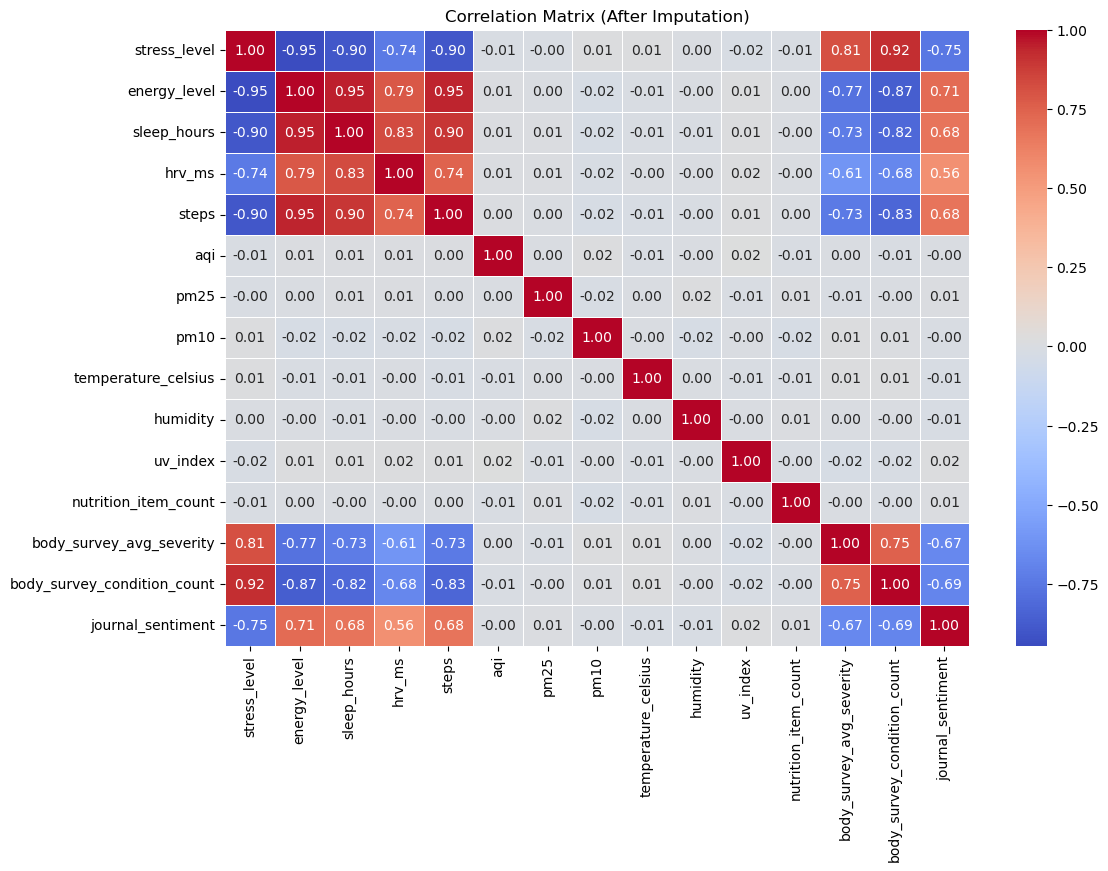

In [26]:
corr_matrix = df.drop(columns=['Date']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (After Imputation)")
plt.show()


In [27]:
# test for multi collinearity
# Drop 'Date' and the target column for VIF calculation
X_for_vif = df.drop(columns=['Date', 'stress_level'])

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_for_vif.values, i) for i in range(X_for_vif.shape[1])]

# Sort and display
print(vif_data.sort_values(by='VIF', ascending=False))

                        Feature         VIF
1                   sleep_hours  216.565603
2                        hrv_ms  110.796325
0                  energy_level   96.647982
3                         steps   47.430168
12  body_survey_condition_count   18.723741
11     body_survey_avg_severity   10.913065
7           temperature_celsius   10.095847
8                      humidity    8.003619
4                           aqi    7.996702
5                          pm25    5.173888
6                          pm10    4.928210
10         nutrition_item_count    3.669119
9                      uv_index    3.179770
13            journal_sentiment    2.271305


### LinearRegression

In [29]:
# Step 7: Define features and target
selected_columns = [
    'journal_sentiment',
    'body_survey_avg_severity',
    'energy_level',
    'sleep_hours',
    'hrv_ms',
    'steps',
    'nutrition_item_count',
]

In [30]:
df_model = df[selected_columns]

X = df_model
y = df['stress_level']


In [31]:
# Step 1: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
y_pred = lr_model.predict(X_test_scaled)

In [35]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9160
RMSE: 0.8371


In [36]:
# first few predictions
for actual, predicted in zip(y_test[:5], y_pred[:5]):
    print(f"Actual: {actual:.1f}, Predicted: {predicted:.2f}")


Actual: 6.0, Predicted: 5.64
Actual: 2.0, Predicted: 2.68
Actual: 7.0, Predicted: 6.43
Actual: 4.0, Predicted: 2.72
Actual: 6.0, Predicted: 5.61


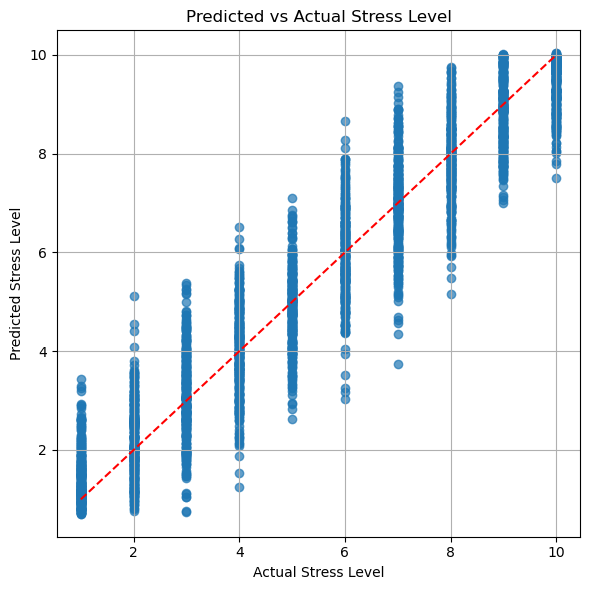

In [37]:
#plot between pred and actual

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Stress Level')
plt.ylabel('Predicted Stress Level')
plt.title('Predicted vs Actual Stress Level')
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:

# # Save model to a .pkl file
# with open('linear_model_final.pkl', 'wb') as file:
#     pickle.dump(lr_model, file)

In [39]:
import pickle

# Save both the scaler and model together
with open('akshata.pkl', 'wb') as f:
    pickle.dump((scaler, lr_model), f)

### RIDGE Regression and LASSO Regression

In [41]:
from sklearn.model_selection import GridSearchCV

# Ridge alpha grid paprameter tuning
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100, 200]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5)
ridge_cv.fit(X_train_scaled, y_train)
print("Best alpha for Ridge:", ridge_cv.best_params_)


Best alpha for Ridge: {'alpha': 0.01}


In [42]:
# Lasso alpha and max_iter parameter tuning
lasso_params = {'alpha': [0.01, 0.1, 0.5, 1, 10], 'max_iter': [1000, 5000, 10000]}
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5)
lasso_cv.fit(X_train_scaled, y_train)
print("Best alpha and max_iter for Lasso:", lasso_cv.best_params_)

Best alpha and max_iter for Lasso: {'alpha': 0.01, 'max_iter': 1000}


In [43]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=10),
    'Lasso': Lasso(alpha=0.1, max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{name}: R² = {r2:.4f}, RMSE = {rmse:.4f}")

LinearRegression: R² = 0.9160, RMSE = 0.8371
Ridge: R² = 0.9159, RMSE = 0.8375
Lasso: R² = 0.9150, RMSE = 0.8417


C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### XGBoost

In [45]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# parameter tuning
xgb = XGBRegressor()
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}
xgb_cv = RandomizedSearchCV(xgb, params, cv=5, n_iter=20, scoring='neg_mean_squared_error', random_state=42)
xgb_cv.fit(X_train_scaled, y_train)
print("Best XGBoost params:", xgb_cv.best_params_)


Best XGBoost params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [46]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# XGBoost
xgb = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.05, random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)
print(f"XGBoost: R² = {r2_score(y_test, xgb_pred):.4f}, RMSE = {mean_squared_error(y_test, xgb_pred, squared=False):.4f}")

XGBoost: R² = 0.9175, RMSE = 0.8293


C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
